# Part 2 - CNN

In [10]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils import data as data_utils


In [31]:
def loader(data, batch_size = 32) : 
   
    train, val, test = data
    train, train_lab = train
    val, val_lab = val
    test, test_lab = test
    
    train_data, val_data, test_data  = torch.from_numpy(train).view(-1, 1,28,28), torch.from_numpy(val).view(-1, 1,28,28), torch.from_numpy(test).view(-1, 1,28,28)
    
    train_target, val_target, test_target  = torch.from_numpy(train_lab),  torch.from_numpy(val_lab), torch.from_numpy(test_lab)



    train_set = data_utils.TensorDataset(train_data, train_target)
    val_set = data_utils.TensorDataset(val_data, val_target)
    test_set = data_utils.TensorDataset(test_data, test_target)
    
    train_loader = data_utils.DataLoader(train_set, batch_size=batch_size, shuffle = True)
    val_loader = data_utils.DataLoader(val_set, batch_size=batch_size, shuffle = False)
    test_loader = data_utils.DataLoader(test_set, batch_size=batch_size, shuffle = False)
    
    return train_loader, val_loader, test_loader



In [32]:
data = np.load('mnist.pkl', encoding ='latin1')
train_loader, val_loader, test_loader = loader(data)

In [99]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
      
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
       
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
       
        self.fc = nn.Linear(7*7*32, num_classes)
      
        
        self.history = []
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
       
     
        out = out.reshape(out.size(0), -1)
        
        out = self.fc(out)
       
       
        return out

class Trainer(object):
    def __init__(self, train_loader,val_loader, epochs = 10, lr_init = 1e-3, batch_size = 32, num_classes = 10):
        self.epochs = epochs
        self.lr = lr_init
        self.loader = train_loader
        self.val_loader = val_loader
        self.batch_size = batch_size
       
        self.model = CNN(num_classes)
        self.history = []
    
   
    
    def train(self,num_classes):
       
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=self.lr)
        for epoch in range(self.epochs):
            for i, (images, labels) in enumerate(self.loader):
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
                if (i+1) % 500 == 0:
                    print ( 'Loss: {:.4f}' 
                           .format(loss.item()))
            self.val()
    
    def val(self) :
        
        correct = 0
        total = 0
        for images, labels in self.val_loader:
            outputs =self.model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        

        print('Val Accuracy of the model : {} %'.format(100 * correct / total))
        
        val_acc = 100 * correct / total
        
        total = 0 
        correct = 0
        
        for images, labels in self.loader:
            outputs =self.model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        print('Train Accuracy of the model : {} %'.format(100 * correct / total))
        
        train_acc = 100 * correct / total
        
        self.history.append([train_acc, val_acc])
        




### Training with lr = 1e-3

In [103]:
trainer = Trainer(train_loader=train_loader, val_loader=val_loader)

In [104]:
trainer.train(10)

Loss: 2.2385
Loss: 2.1332
Loss: 1.5196
Val Accuracy of the model : 74.42 %
Train Accuracy of the model : 72.384 %
Loss: 0.8402
Loss: 0.8174
Loss: 0.3159
Val Accuracy of the model : 88.05 %
Train Accuracy of the model : 86.65 %
Loss: 0.6537
Loss: 0.5298
Loss: 0.1833
Val Accuracy of the model : 90.69 %
Train Accuracy of the model : 89.468 %
Loss: 0.2659
Loss: 0.6090
Loss: 0.3970
Val Accuracy of the model : 91.83 %
Train Accuracy of the model : 90.968 %
Loss: 0.6521
Loss: 0.4905
Loss: 0.0506
Val Accuracy of the model : 92.63 %
Train Accuracy of the model : 91.786 %
Loss: 0.6906
Loss: 0.1469
Loss: 0.3711
Val Accuracy of the model : 92.89 %
Train Accuracy of the model : 92.144 %
Loss: 0.2427
Loss: 0.4244
Loss: 0.2388
Val Accuracy of the model : 93.92 %
Train Accuracy of the model : 93.14 %
Loss: 0.2502
Loss: 0.3222
Loss: 0.0553
Val Accuracy of the model : 94.27 %
Train Accuracy of the model : 93.576 %
Loss: 0.3467
Loss: 0.2586
Loss: 0.0734
Val Accuracy of the model : 94.79 %
Train Accuracy 

In [105]:
history = trainer.history

In [124]:
def plot(history):
    history = np.array(history)
    plt.plot(history[:,0], label ='train')
    plt.plot(history[:,1], label = 'val')
    plt.legend(['train', 'val'], loc='upper left')
    plt.title('Train/Val Accuracy evolution')

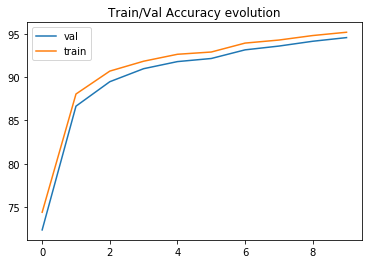

In [109]:
plot(history)